In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import matplotlib.cm as cm

In [2]:
#loading data
data = pd.read_csv(r"C:\Users\GBjon\OneDrive\Desktop\Practicum\Data\combined_data.csv")
len(data)

62631

In [5]:
data.columns

Index(['mask_studentpersonkey', 'GradeLevel', 'DropOut', 'graduated?',
       'total_present', 'total_absent', 'total_days', 'total_tardy',
       'present_pct', 'chronic_absent_10pct', 'test_score_2023',
       'test_score_2024', 'test_score_2025', 'test_score_2026',
       'MaskedStudentPersonKey', 'HS_CollaborativeProblemSolving',
       'HS_ReflectiveLearningStrategies', 'HS_Self-Awareness',
       'HS_Self-Management', 'HS_SenseofBelonging', 'HS_SocialCompetence',
       'MS_CollaborativeProblemSolving', 'MS_ReflectiveLearningStrategies',
       'MS_Self-Awareness', 'MS_Self-Management', 'MS_SenseofBelonging',
       'MS_SocialCompetence', 'num_discipline_2023', 'num_discipline_2024',
       'num_discipline_2025', 'num_discipline_2026', 'HS_PctEarned',
       'HS_IsRepeater', 'MAP_WeeksOfInstruction', 'MAP_TestDurationMinutes',
       'MAP_TestRITScore', 'MAP_TestPercentile', 'MAP_PercentCorrect'],
      dtype='object')

In [7]:
data.head(20)

,mask_studentpersonkey,GradeLevel,DropOut,graduated?,total_present,total_absent,total_days,total_tardy,present_pct,chronic_absent_10pct,...,num_discipline_2024,num_discipline_2025,num_discipline_2026,HS_PctEarned,HS_IsRepeater,MAP_WeeksOfInstruction,MAP_TestDurationMinutes,MAP_TestRITScore,MAP_TestPercentile,MAP_PercentCorrect
0,393216,9,0,0,486.0,62.0,548.0,0.0,0.886861,1.0,...,NaN,NaN,NaN,NaN,NaN,1.000000,7.214286,216.000000,45.500000,8.928571
1,393218,12,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,0.0,0.857143,10.250000,240.500000,66.750000,8.428571
2,393221,9,0,0,524.0,24.0,548.0,0.0,0.956204,0.0,...,NaN,NaN,NaN,NaN,NaN,1.000000,15.142857,224.000000,64.000000,8.857143
3,262151,12,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,0.0,0.785714,5.392857,202.750000,26.750000,6.785714
4,442879,9,0,0,544.0,4.0,548.0,0.0,0.992701,0.0,...,NaN,NaN,NaN,NaN,NaN,1.000000,7.142857,249.000000,86.000000,10.142857
5,1510994,9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.411765,0.0,0.938776,11.897959,200.142857,11.307692,7.897959
6,393231,9,0,0,525.0,23.0,548.0,0.0,0.958029,0.0,...,0.0,0.0,0.0,NaN,NaN,1.000000,3.928571,209.000000,30.000000,8.357143
7,393234,10,0,0,510.0,38.0,548.0,0.0,0.930657,0.0,...,NaN,NaN,NaN,1.000000,0.0,0.785714,8.928571,212.000000,31.000000,7.642857
8,1510995,10,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.777778,0.0,0.785714,12.666667,216.833333,42.500000,7.523810
9,393235,10,0,0,509.0,34.0,543.0,0.0,0.937385,0.0,...,2.0,7.0,0.0,1.000000,0.0,1.000000,12.809524,221.333333,50.666667,8.285714


In [9]:
#Getting rid of unused columns
data = data.drop(columns = ['total_present', 'total_absent', 'total_days', 'test_score_2023', 'test_score_2024', 'test_score_2026', 
                            'MaskedStudentPersonKey'])

In [11]:
#Summing Discipline data into one column
data['num_discipline'] = data['num_discipline_2023'] + data['num_discipline_2024'] + data['num_discipline_2025'] + data['num_discipline_2026']

In [13]:
#Removing Individual discpline columns
data = data.drop(columns = ['num_discipline_2023', 'num_discipline_2024',
       'num_discipline_2025', 'num_discipline_2026'])

In [15]:
data['num_discipline'] = data['num_discipline'].fillna(0)

In [17]:
#Dropping middleschool behavorial data
data = data.drop(columns = ['MS_CollaborativeProblemSolving', 'MS_ReflectiveLearningStrategies',
       'MS_Self-Awareness', 'MS_Self-Management', 'MS_SenseofBelonging',
       'MS_SocialCompetence'])

In [19]:
#Looking at NA's per column
for col in data.columns:
    num_na = data[col].isna().sum()
    print(col + " NaN's : " + str(num_na))

mask_studentpersonkey NaN's : 0
GradeLevel NaN's : 0
DropOut NaN's : 0
graduated? NaN's : 0
total_tardy NaN's : 33154
present_pct NaN's : 33154
chronic_absent_10pct NaN's : 33154
test_score_2025 NaN's : 36448
HS_CollaborativeProblemSolving NaN's : 20983
HS_ReflectiveLearningStrategies NaN's : 20977
HS_Self-Awareness NaN's : 20989
HS_Self-Management NaN's : 20965
HS_SenseofBelonging NaN's : 20983
HS_SocialCompetence NaN's : 20974
HS_PctEarned NaN's : 12960
HS_IsRepeater NaN's : 12960
MAP_WeeksOfInstruction NaN's : 12034
MAP_TestDurationMinutes NaN's : 12034
MAP_TestRITScore NaN's : 12034
MAP_TestPercentile NaN's : 12034
MAP_PercentCorrect NaN's : 12034
num_discipline NaN's : 0


In [21]:
#Percentage NaN per column 
for col in data.columns:
    pct_na = data[col].isna().sum() / len(data[col])
    print(col + " % NaN's : " + str(round(pct_na, 2) * 100))

mask_studentpersonkey % NaN's : 0.0
GradeLevel % NaN's : 0.0
DropOut % NaN's : 0.0
graduated? % NaN's : 0.0
total_tardy % NaN's : 53.0
present_pct % NaN's : 53.0
chronic_absent_10pct % NaN's : 53.0
test_score_2025 % NaN's : 57.99999999999999
HS_CollaborativeProblemSolving % NaN's : 34.0
HS_ReflectiveLearningStrategies % NaN's : 33.0
HS_Self-Awareness % NaN's : 34.0
HS_Self-Management % NaN's : 33.0
HS_SenseofBelonging % NaN's : 34.0
HS_SocialCompetence % NaN's : 33.0
HS_PctEarned % NaN's : 21.0
HS_IsRepeater % NaN's : 21.0
MAP_WeeksOfInstruction % NaN's : 19.0
MAP_TestDurationMinutes % NaN's : 19.0
MAP_TestRITScore % NaN's : 19.0
MAP_TestPercentile % NaN's : 19.0
MAP_PercentCorrect % NaN's : 19.0
num_discipline % NaN's : 0.0


In [23]:
data.head()

,mask_studentpersonkey,GradeLevel,DropOut,graduated?,total_tardy,present_pct,chronic_absent_10pct,test_score_2025,HS_CollaborativeProblemSolving,HS_ReflectiveLearningStrategies,...,HS_SenseofBelonging,HS_SocialCompetence,HS_PctEarned,HS_IsRepeater,MAP_WeeksOfInstruction,MAP_TestDurationMinutes,MAP_TestRITScore,MAP_TestPercentile,MAP_PercentCorrect,num_discipline
0,393216,9,0,0,0.0,0.886861,1.0,70.091090,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,7.214286,216.00,45.50,8.928571,0.0
1,393218,12,0,1,NaN,NaN,NaN,NaN,7.333333,7.166667,...,10.0,11.166667,1.0,0.0,0.857143,10.250000,240.50,66.75,8.428571,0.0
2,393221,9,0,0,0.0,0.956204,0.0,77.075256,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,15.142857,224.00,64.00,8.857143,0.0
3,262151,12,0,1,NaN,NaN,NaN,NaN,5.000000,6.000000,...,6.0,8.000000,1.0,0.0,0.785714,5.392857,202.75,26.75,6.785714,0.0
4,442879,9,0,0,0.0,0.992701,0.0,88.968600,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,7.142857,249.00,86.00,10.142857,0.0


In [25]:
#Filtering drop outs and graduates into one dataframe, and current students into another
not_in_school = data[(data['graduated?'] == 1) | (data['DropOut'] == 1)]
in_school = data[(data['graduated?'] == 0) & (data['DropOut'] == 0)]

#Check:
print(len(data) == len(not_in_school) + len(in_school))

True


In [27]:
len(not_in_school)

22833

In [29]:
#Looking at drop outs for students not in school
not_in_school['DropOut'].value_counts()

DropOut
0    21425
1     1408
Name: count, dtype: int64

<Axes: title={'center': 'MAP_TestRITScore'}, xlabel='DropOut'>

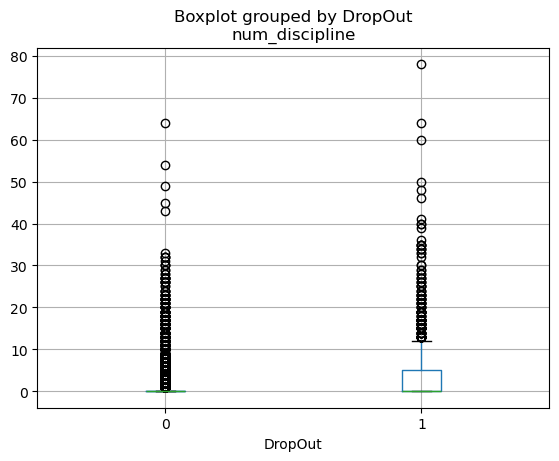

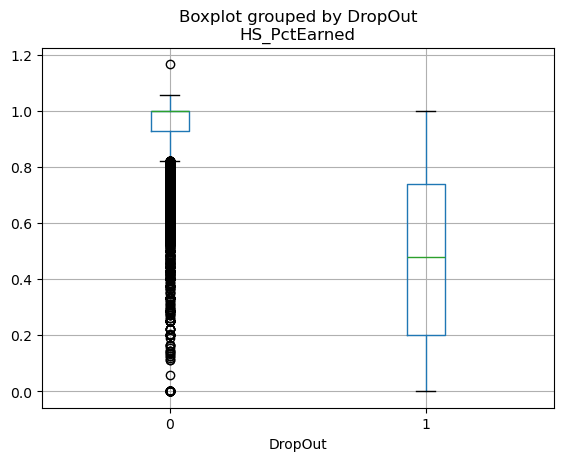

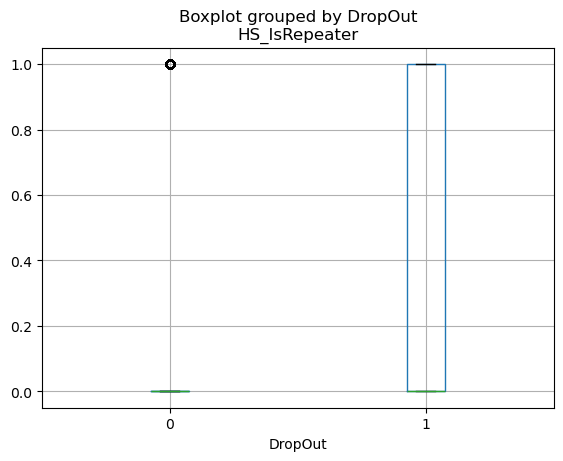

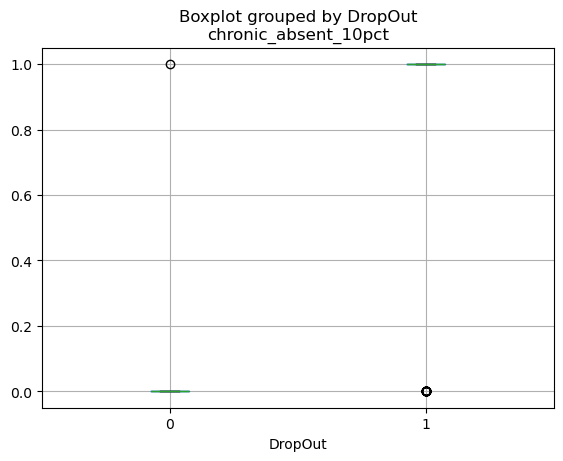

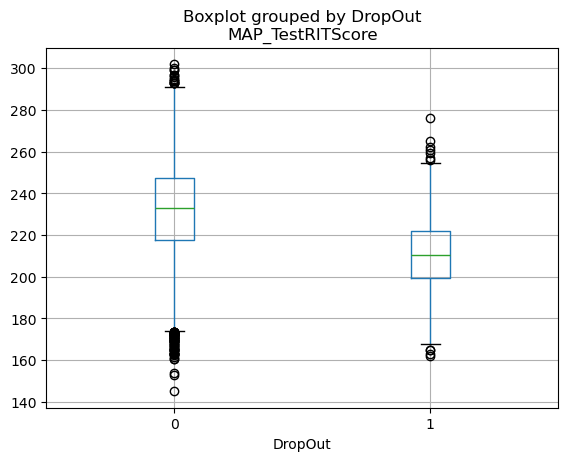

In [31]:
#Boxplots for students not in school
not_in_school.boxplot(column = ['num_discipline'], by = 'DropOut')
not_in_school.boxplot(column = ['HS_PctEarned'], by = 'DropOut')
not_in_school.boxplot(column = ['HS_IsRepeater'], by = 'DropOut')
not_in_school.boxplot(column = ['chronic_absent_10pct'], by = 'DropOut')
not_in_school.boxplot(column = ['MAP_TestRITScore'], by = 'DropOut')


In [32]:
#Correlation coefficients
not_in_school.iloc[:,2:].corr()

,DropOut,graduated?,total_tardy,present_pct,chronic_absent_10pct,test_score_2025,HS_CollaborativeProblemSolving,HS_ReflectiveLearningStrategies,HS_Self-Awareness,HS_Self-Management,HS_SenseofBelonging,HS_SocialCompetence,HS_PctEarned,HS_IsRepeater,MAP_WeeksOfInstruction,MAP_TestDurationMinutes,MAP_TestRITScore,MAP_TestPercentile,MAP_PercentCorrect,num_discipline
DropOut,1.000000,-0.923173,0.037022,-0.244724,0.292555,-0.257546,-0.089232,-0.065625,-0.068772,-0.062635,-0.123618,-0.080353,-0.591199,0.309564,-0.113962,-0.014003,-0.193339,-0.195115,-0.045381,0.238314
graduated?,-0.923173,1.000000,-0.037022,0.244724,-0.292555,0.276868,0.089682,0.073533,0.072437,0.069976,0.117182,0.083119,0.606896,-0.311278,0.108651,0.014131,0.185300,0.187568,0.036246,-0.237960
total_tardy,0.037022,-0.037022,1.000000,-0.047076,0.076858,0.099881,-0.055465,-0.055069,0.131221,0.177704,-0.119141,0.063940,0.017555,0.097371,-0.044967,-0.071089,0.240678,0.173830,0.126477,0.369440
present_pct,-0.244724,0.244724,-0.047076,1.000000,-0.665395,0.158713,-0.019195,-0.048890,-0.077083,0.135313,0.103194,0.059464,0.538208,-0.263451,0.154440,0.146663,0.058223,0.062944,-0.017095,-0.116872
chronic_absent_10pct,0.292555,-0.292555,0.076858,-0.665395,1.000000,-0.130821,-0.029969,-0.070876,0.013105,-0.129531,-0.067628,-0.090180,-0.456217,0.254826,-0.121422,-0.132336,-0.147929,-0.149366,-0.036947,0.198911
test_score_2025,-0.257546,0.276868,0.099881,0.158713,-0.130821,1.000000,0.162030,0.134450,0.093827,0.143810,0.147668,0.134581,0.310935,-0.156095,-0.002335,0.001346,0.318549,0.285254,0.067423,-0.152623
HS_CollaborativeProblemSolving,-0.089232,0.089682,-0.055465,-0.019195,-0.029969,0.162030,1.000000,0.669689,0.647372,0.677999,0.642217,0.628217,0.175687,-0.080985,0.027140,-0.022543,0.268505,0.230680,0.143524,-0.078879
HS_ReflectiveLearningStrategies,-0.065625,0.073533,-0.055069,-0.048890,-0.070876,0.134450,0.669689,1.000000,0.583910,0.717948,0.575837,0.577507,0.148714,-0.071697,0.010363,-0.031798,0.206367,0.169945,0.121853,-0.058932
HS_Self-Awareness,-0.068772,0.072437,0.131221,-0.077083,0.013105,0.093827,0.647372,0.583910,1.000000,0.638303,0.516535,0.622594,0.127663,-0.063662,-0.003142,0.004957,0.216415,0.187745,0.113637,-0.083237
HS_Self-Management,-0.062635,0.069976,0.177704,0.135313,-0.129531,0.143810,0.677999,0.717948,0.638303,1.000000,0.581667,0.630419,0.147254,-0.064112,0.014543,-0.035889,0.186838,0.161575,0.095147,-0.072432


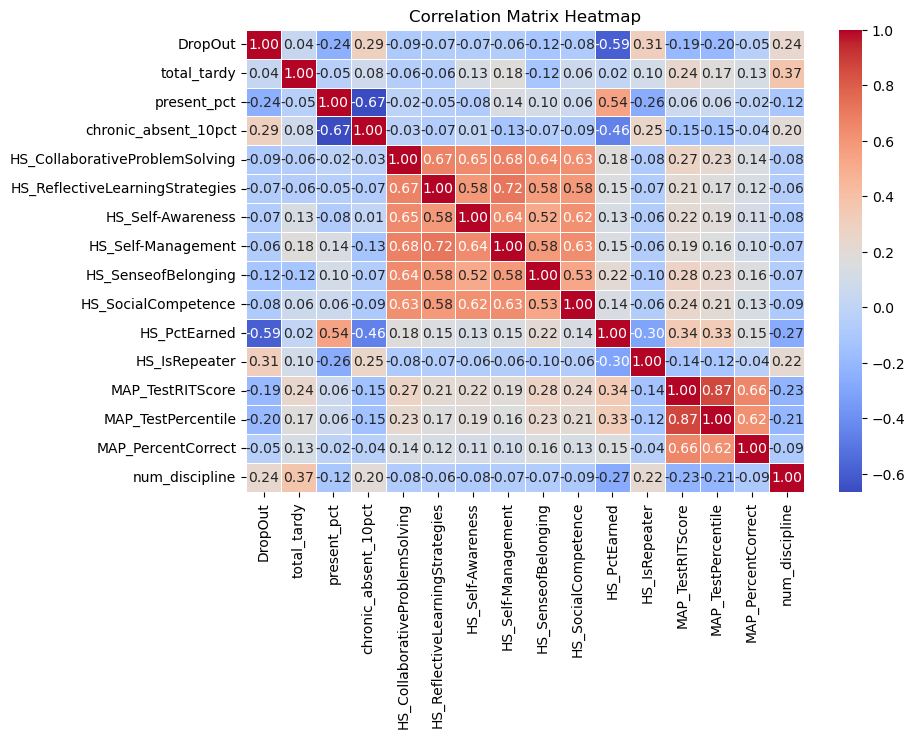

In [35]:
plt.figure(figsize=(9, 6)) # Adjust figure size as needed
sns.heatmap(not_in_school.iloc[:,[2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21]].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
not_in_school.columns

Index(['mask_studentpersonkey', 'GradeLevel', 'DropOut', 'graduated?',
       'total_tardy', 'present_pct', 'chronic_absent_10pct', 'test_score_2025',
       'HS_CollaborativeProblemSolving', 'HS_ReflectiveLearningStrategies',
       'HS_Self-Awareness', 'HS_Self-Management', 'HS_SenseofBelonging',
       'HS_SocialCompetence', 'HS_PctEarned', 'HS_IsRepeater',
       'MAP_WeeksOfInstruction', 'MAP_TestDurationMinutes', 'MAP_TestRITScore',
       'MAP_TestPercentile', 'MAP_PercentCorrect', 'num_discipline'],
      dtype='object')

In [39]:
#Organizing Data into Train and Test Split
X = not_in_school[['present_pct', 'HS_SenseofBelonging', 'MAP_TestPercentile', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned']]

y = not_in_school['DropOut']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2026)

In [43]:
#Oversampling technique #1 - OverSampler
ros = RandomOverSampler(random_state=2026)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
y_resampled.value_counts()

DropOut
0    15003
1    15003
Name: count, dtype: int64

In [45]:
#Gradient Boosting Classifier
gb = HistGradientBoostingClassifier(random_state=0, max_iter = 5000).fit(X_train, y_train)
gb.score(X_test, y_test)

0.9651094890510948

In [47]:
#Predictions
pred1 = gb.predict(X_test)

In [49]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred1)

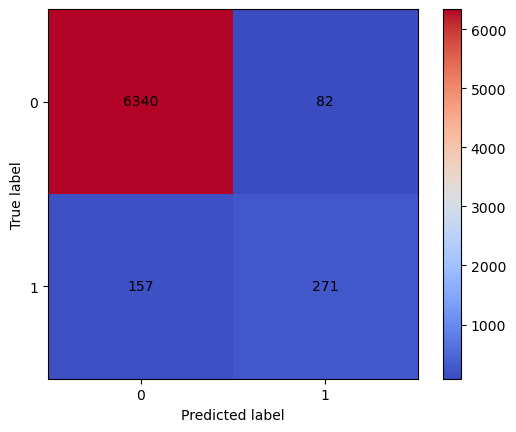

In [67]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap = cm.coolwarm, text_kw = {'color': 'black'})
plt.show()

In [376]:
#Feature Importance
importance = permutation_importance(gb, X_resampled, y_resampled, n_repeats = 10, scoring = 'accuracy')

for i in range(len(X.columns)):
    print(X.columns[i] + " Mean Importance: " + str(importance['importances_mean'][i]))

present_pct Mean Importance: 0.06044791041791642
HS_SenseofBelonging Mean Importance: 0.1556022128907552
MAP_TestPercentile Mean Importance: 0.20740851829634072
num_discipline Mean Importance: 0.0979370792508165
HS_IsRepeater Mean Importance: 0.0938012397520496
test_score_2025 Mean Importance: 0.031247083916550022


In [55]:
#Final Boost Model
gb_final = HistGradientBoostingClassifier(random_state=0, max_iter = 1000).fit(X, y)

In [59]:
#Final predictions and probabilities
final_pred = gb_final.predict(in_school[['present_pct', 'HS_SenseofBelonging', 'MAP_TestPercentile', 'num_discipline', 'HS_IsRepeater',
                   'HS_PctEarned']])

final_prob = gb_final.predict_proba(in_school[['present_pct', 'HS_SenseofBelonging', 'MAP_TestPercentile', 'num_discipline', 'HS_IsRepeater',
                   'HS_PctEarned']])

#in_school['probability'] = final_prob

#in_school['prediction'].value_counts()

print("Amount classified as dropouts: " + str(sum(final_pred == 1)))
print("Amount classified as non-dropouts: " + str(sum(final_pred == 0)))

Amount classified as dropouts: 21847
Amount classified as non-dropouts: 17951


In [61]:
#Organizing the probabilities of each student droppint out according to the model
drop_out_probs = []

for i in range(len(final_prob)):
    drop_out_probs.append(final_prob[i][1])


In [63]:
#Classifying the students based on probabilities
student_classification = []

for i in range(len(drop_out_probs)):
    if drop_out_probs[i] < 0.2:
        student_classification.append('Low Risk')
    elif drop_out_probs[i] < 0.4:
        student_classification.append('Moderately Low Risk')
    elif drop_out_probs[i] < 0.6:
        student_classification.append('Moderate Risk')
    elif drop_out_probs[i] < 0.8:
        student_classification.append('Moderately High Risk')
    else:
        student_classification.append('High Risk')

in_school['Risk Profile'] = student_classification
in_school['Risk Profile'].value_counts()
        

C:\Users\GBjon\AppData\Local\Temp\ipykernel_15180\3446179001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_school['Risk Profile'] = student_classification


Risk Profile
High Risk               15308
Low Risk                12129
Moderately High Risk     5230
Moderately Low Risk      4641
Moderate Risk            2490
Name: count, dtype: int64

In [386]:
in_school.head()

,mask_studentpersonkey,GradeLevel,DropOut,graduated?,total_tardy,present_pct,chronic_absent_10pct,test_score_2025,HS_CollaborativeProblemSolving,HS_ReflectiveLearningStrategies,...,HS_SocialCompetence,HS_PctEarned,HS_IsRepeater,MAP_WeeksOfInstruction,MAP_TestDurationMinutes,MAP_TestRITScore,MAP_TestPercentile,MAP_PercentCorrect,num_discipline,Risk Profile
0,393216,9,0,0,0.0,0.886861,1.0,70.091090,NaN,NaN,...,NaN,NaN,NaN,1.000000,7.214286,218.0,48.0,53.0,0.0,High Risk
2,393221,9,0,0,0.0,0.956204,0.0,77.075256,NaN,NaN,...,NaN,NaN,NaN,1.000000,15.142857,225.0,73.0,53.0,0.0,High Risk
4,442879,9,0,0,0.0,0.992701,0.0,88.968600,NaN,NaN,...,NaN,NaN,NaN,1.000000,7.142857,273.0,99.0,63.0,0.0,High Risk
5,1510994,9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.411765,0.0,0.938776,11.897959,216.0,30.0,56.0,6.0,Low Risk
6,393231,9,0,0,0.0,0.958029,0.0,71.739500,NaN,NaN,...,NaN,NaN,NaN,1.000000,3.928571,212.0,30.0,49.0,1.0,High Risk


In [37]:
#Trying imputation with logistic regression
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
logit_data = data.dropna(subset=['HS_SenseofBelonging'])
logit_data[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']] = imputer.fit_transform(logit_data[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']])

not_in_school = logit_data[(logit_data['graduated?'] == 1) | (logit_data['DropOut'] == 1)]
in_school = logit_data[(logit_data['graduated?'] == 0) & (logit_data['DropOut'] == 0)]

C:\Users\GBjon\AppData\Local\Temp\ipykernel_9112\3244072847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logit_data[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']] = imputer.fit_transform(logit_data[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']])


In [39]:
70#Making training/testing set and oversampling
X_train, X_test, y_train, y_test = train_test_split(not_in_school[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']], not_in_school['DropOut'], test_size=0.3, random_state=2026)

ros = RandomOverSampler(random_state=2026)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
y_resampled.value_counts()

DropOut
0    12366
1    12366
Name: count, dtype: int64

In [41]:
#Logistic Regression Model
logit_model = LogisticRegression(penalty='l2', C=1.0, solver='newton-cg', max_iter = 200)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='newton-cg')

In [43]:
#Calculating Validation Accuracy
logit_pred = logit_model.predict(X_test)

logit_pred_prob = logit_model.predict_proba(X_test)

#Classifying based on a different threshold
for i in range(len(logit_pred_prob)):
    if logit_pred_prob[i][1] <= 0.5:
        logit_pred[i] = 0
    else:
        logit_pred[i] = 1

sum(y_test == logit_pred) / len(y_test)

0.9750727802037845

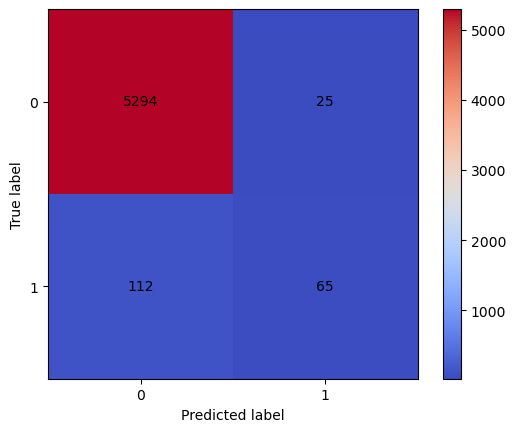

In [45]:
#Confusion Matrix
conf_matrix_logit = confusion_matrix(y_test, logit_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logit, display_labels=[0, 1])
disp.plot(cmap = cm.coolwarm, text_kw = {'color': 'black'})
plt.show()

In [47]:
final_logit_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter = 200)
final_logit_model.fit(not_in_school[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']], not_in_school['DropOut'])

LogisticRegression(max_iter=200)

In [49]:
final_logit_pred = final_logit_model.predict(in_school[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']])
final_logit_prob = final_logit_model.predict_proba(in_school[['MAP_TestRITScore', 'num_discipline', 'HS_IsRepeater', 'HS_PctEarned', 'HS_SenseofBelonging']])

In [51]:
#Organizing the probabilities of each student droppint out according to the model
drop_out_logit_probs = []

for i in range(len(final_logit_prob)):
    drop_out_logit_probs.append(final_logit_prob[i][1])

In [53]:
#Classifying the students based on probabilities
student_classification = []

for i in range(len(drop_out_logit_probs)):
    if drop_out_logit_probs[i] < 0.2:
        student_classification.append('Low Risk')
    elif drop_out_logit_probs[i] < 0.4:
        student_classification.append('Moderately Low Risk')
    elif drop_out_logit_probs[i] < 0.6:
        student_classification.append('Moderate Risk')
    elif drop_out_logit_probs[i] < 0.8:
        student_classification.append('Moderately High Risk')
    else:
        student_classification.append('High Risk')

in_school['Risk Profile - Logit for Drop Outs'] = student_classification
in_school['Risk Profile - Logit for Drop Outs'].value_counts()

C:\Users\GBjon\AppData\Local\Temp\ipykernel_9112\1403947874.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_school['Risk Profile - Logit for Drop Outs'] = student_classification


Risk Profile - Logit for Drop Outs
Low Risk                21716
Moderately Low Risk       578
Moderate Risk             405
Moderately High Risk      329
High Risk                 302
Name: count, dtype: int64

In [55]:
in_school.head()

,mask_studentpersonkey,GradeLevel,DropOut,graduated?,total_tardy,present_pct,chronic_absent_10pct,test_score_2025,HS_CollaborativeProblemSolving,HS_ReflectiveLearningStrategies,...,HS_SocialCompetence,HS_PctEarned,HS_IsRepeater,MAP_WeeksOfInstruction,MAP_TestDurationMinutes,MAP_TestRITScore,MAP_TestPercentile,MAP_PercentCorrect,num_discipline,Risk Profile - Logit for Drop Outs
7,393234,10,0,0,0.0,0.930657,0.0,60.786389,6.5,6.00,...,10.500000,1.000000,0.000000,0.785714,8.928571,212.000000,31.000000,7.642857,0.0,Low Risk
8,1510995,10,0,0,NaN,NaN,NaN,NaN,7.0,5.00,...,10.000000,0.777778,0.000000,0.785714,12.666667,216.833333,42.500000,7.523810,4.0,Low Risk
9,393235,10,0,0,0.0,0.937385,0.0,55.692586,7.0,6.00,...,11.333333,1.000000,0.000000,1.000000,12.809524,221.333333,50.666667,8.285714,10.0,Low Risk
13,393245,11,0,0,0.0,0.941606,0.0,60.822929,4.0,3.25,...,7.500000,0.937500,0.000000,0.904762,6.119048,226.000000,36.600000,8.357143,0.0,Low Risk
16,393249,9,0,0,0.0,0.985401,0.0,41.823787,4.0,4.00,...,6.000000,0.928518,0.038407,1.000000,10.285714,200.500000,16.000000,8.714286,1.0,Low Risk


In [57]:
final_logit_model.densify()

LogisticRegression(max_iter=200)